## What follows is some knn implementation in numpy

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
plt.rcParams['figure.facecolor'] = '.2'
plt.rcParams['axes.facecolor'] = '.1'
pd.set_option('display.float_format', '{:.2f}'.format)

In [41]:
np.random.seed(42)
X = np.random.rand(10,2)
X

array([[0.37, 0.95],
       [0.73, 0.6 ],
       [0.16, 0.16],
       [0.06, 0.87],
       [0.6 , 0.71],
       [0.02, 0.97],
       [0.83, 0.21],
       [0.18, 0.18],
       [0.3 , 0.52],
       [0.43, 0.29]])

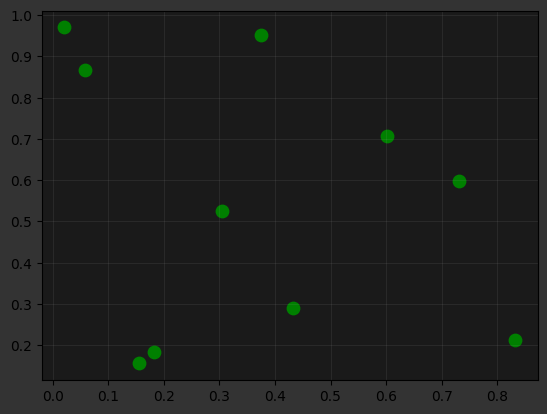

In [42]:
plt.scatter(X[:,0], X[:,1], facecolor='green', s=80)
plt.grid(alpha=.1)

In [46]:
#broadcasting in action
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [47]:
X[:, np.newaxis, :], X[np.newaxis, :, :] #this allows you to add any number of dimensions to X

(array([[[0.37, 0.95]],
 
        [[0.73, 0.6 ]],
 
        [[0.16, 0.16]],
 
        [[0.06, 0.87]],
 
        [[0.6 , 0.71]],
 
        [[0.02, 0.97]],
 
        [[0.83, 0.21]],
 
        [[0.18, 0.18]],
 
        [[0.3 , 0.52]],
 
        [[0.43, 0.29]]]),
 array([[[0.37, 0.95],
         [0.73, 0.6 ],
         [0.16, 0.16],
         [0.06, 0.87],
         [0.6 , 0.71],
         [0.02, 0.97],
         [0.83, 0.21],
         [0.18, 0.18],
         [0.3 , 0.52],
         [0.43, 0.29]]]))

In [48]:
#let's go step by step
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences

array([[[ 0.  ,  0.  ],
        [-0.36,  0.35],
        [ 0.22,  0.79],
        [ 0.32,  0.08],
        [-0.23,  0.24],
        [ 0.35, -0.02],
        [-0.46,  0.74],
        [ 0.19,  0.77],
        [ 0.07,  0.43],
        [-0.06,  0.66]],

       [[ 0.36, -0.35],
        [ 0.  ,  0.  ],
        [ 0.58,  0.44],
        [ 0.67, -0.27],
        [ 0.13, -0.11],
        [ 0.71, -0.37],
        [-0.1 ,  0.39],
        [ 0.55,  0.42],
        [ 0.43,  0.07],
        [ 0.3 ,  0.31]],

       [[-0.22, -0.79],
        [-0.58, -0.44],
        [ 0.  ,  0.  ],
        [ 0.1 , -0.71],
        [-0.45, -0.55],
        [ 0.14, -0.81],
        [-0.68, -0.06],
        [-0.03, -0.03],
        [-0.15, -0.37],
        [-0.28, -0.14]],

       [[-0.32, -0.08],
        [-0.67,  0.27],
        [-0.1 ,  0.71],
        [ 0.  ,  0.  ],
        [-0.54,  0.16],
        [ 0.04, -0.1 ],
        [-0.77,  0.65],
        [-0.12,  0.68],
        [-0.25,  0.34],
        [-0.37,  0.57]],

       [[ 0.23, -0.24],
        

In [49]:
#notice that when using k-nn the sqrt is not taken most of the times in order to avoid big computations for large data
(differences ** 2).sum(-1)

array([[0.  , 0.25, 0.68, 0.11, 0.11, 0.13, 0.75, 0.63, 0.19, 0.44],
       [0.25, 0.  , 0.53, 0.53, 0.03, 0.64, 0.16, 0.48, 0.19, 0.18],
       [0.68, 0.53, 0.  , 0.51, 0.5 , 0.68, 0.46, 0.  , 0.16, 0.09],
       [0.11, 0.53, 0.51, 0.  , 0.32, 0.01, 1.03, 0.48, 0.18, 0.47],
       [0.11, 0.03, 0.5 , 0.32, 0.  , 0.41, 0.3 , 0.45, 0.12, 0.2 ],
       [0.13, 0.64, 0.68, 0.01, 0.41, 0.  , 1.23, 0.64, 0.28, 0.63],
       [0.75, 0.16, 0.46, 1.03, 0.3 , 1.23, 0.  , 0.42, 0.38, 0.17],
       [0.63, 0.48, 0.  , 0.48, 0.45, 0.64, 0.42, 0.  , 0.13, 0.07],
       [0.19, 0.19, 0.16, 0.18, 0.12, 0.28, 0.38, 0.13, 0.  , 0.07],
       [0.44, 0.18, 0.09, 0.47, 0.2 , 0.63, 0.17, 0.07, 0.07, 0.  ]])

In [50]:
np.all(dist_sq == (differences ** 2).sum(-1))

True

In [51]:
dist_sq

array([[0.  , 0.25, 0.68, 0.11, 0.11, 0.13, 0.75, 0.63, 0.19, 0.44],
       [0.25, 0.  , 0.53, 0.53, 0.03, 0.64, 0.16, 0.48, 0.19, 0.18],
       [0.68, 0.53, 0.  , 0.51, 0.5 , 0.68, 0.46, 0.  , 0.16, 0.09],
       [0.11, 0.53, 0.51, 0.  , 0.32, 0.01, 1.03, 0.48, 0.18, 0.47],
       [0.11, 0.03, 0.5 , 0.32, 0.  , 0.41, 0.3 , 0.45, 0.12, 0.2 ],
       [0.13, 0.64, 0.68, 0.01, 0.41, 0.  , 1.23, 0.64, 0.28, 0.63],
       [0.75, 0.16, 0.46, 1.03, 0.3 , 1.23, 0.  , 0.42, 0.38, 0.17],
       [0.63, 0.48, 0.  , 0.48, 0.45, 0.64, 0.42, 0.  , 0.13, 0.07],
       [0.19, 0.19, 0.16, 0.18, 0.12, 0.28, 0.38, 0.13, 0.  , 0.07],
       [0.44, 0.18, 0.09, 0.47, 0.2 , 0.63, 0.17, 0.07, 0.07, 0.  ]])

In [52]:
ind_col = ['x_'+ str(i) for i in range(dist_sq.shape[0])]
ind_col

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9']

In [53]:
pd.DataFrame(dist_sq, index=ind_col,columns=ind_col)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
x_0,0.00,0.25,0.68,0.11,0.11,0.13,0.75,0.63,0.19,0.44
x_1,0.25,0.00,0.53,0.53,0.03,0.64,0.16,0.48,0.19,0.18
x_2,0.68,0.53,0.00,0.51,0.50,0.68,0.46,0.00,0.16,0.09
x_3,0.11,0.53,0.51,0.00,0.32,0.01,1.03,0.48,0.18,0.47
x_4,0.11,0.03,0.50,0.32,0.00,0.41,0.30,0.45,0.12,0.20
x_5,0.13,0.64,0.68,0.01,0.41,0.00,1.23,0.64,0.28,0.63
x_6,0.75,0.16,0.46,1.03,0.30,1.23,0.00,0.42,0.38,0.17
x_7,0.63,0.48,0.00,0.48,0.45,0.64,0.42,0.00,0.13,0.07
x_8,0.19,0.19,0.16,0.18,0.12,0.28,0.38,0.13,0.00,0.07
x_9,0.44,0.18,0.09,0.47,0.20,0.63,0.17,0.07,0.07,0.00


In [54]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
nearest = np.argsort(dist_sq, axis=-1)
nearest

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]], dtype=int64)

In [56]:
#to avoid to much computation it is possible to use argpartition here
K = 2

In [57]:
#notice K+1 since the first index is always the difference between x_n and x_n
nearest_partition =  np.argpartition(dist_sq, K+1, axis=1)
nearest_partition

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 3, 5, 2, 7, 8, 0],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [3, 5, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 3, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 3, 5, 2, 7, 8, 0],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 1, 6, 4, 5, 3, 0]], dtype=int64)

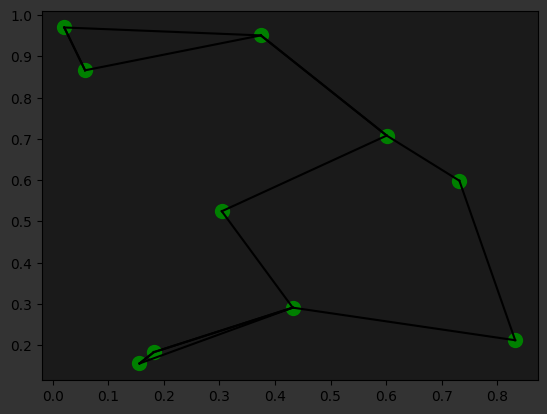

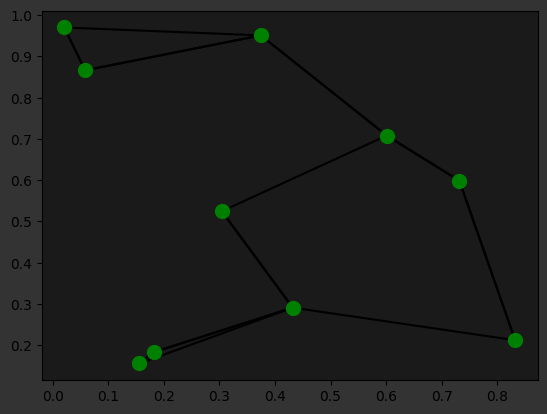

In [58]:
plt.scatter(X[:, 0], X[:, 1], s = 100, facecolor='green')

for i in range(X.shape[0]):
    for j in nearest_partition[i, 1:K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

plt.show()


plt.scatter(X[:, 0], X[:, 1], s = 100, facecolor='green', zorder=1)

for i in range(X.shape[0]):
    for j in nearest[i, 1:K+1]:
        plt.plot(*zip(X[j], X[i]), color='black', zorder=0)

plt.show()

--------------

### now let's generalize for n-dim

In [61]:
np.random.seed(42)
X = np.random.rand(10,8)
X

array([[0.37, 0.95, 0.73, 0.6 , 0.16, 0.16, 0.06, 0.87],
       [0.6 , 0.71, 0.02, 0.97, 0.83, 0.21, 0.18, 0.18],
       [0.3 , 0.52, 0.43, 0.29, 0.61, 0.14, 0.29, 0.37],
       [0.46, 0.79, 0.2 , 0.51, 0.59, 0.05, 0.61, 0.17],
       [0.07, 0.95, 0.97, 0.81, 0.3 , 0.1 , 0.68, 0.44],
       [0.12, 0.5 , 0.03, 0.91, 0.26, 0.66, 0.31, 0.52],
       [0.55, 0.18, 0.97, 0.78, 0.94, 0.89, 0.6 , 0.92],
       [0.09, 0.2 , 0.05, 0.33, 0.39, 0.27, 0.83, 0.36],
       [0.28, 0.54, 0.14, 0.8 , 0.07, 0.99, 0.77, 0.2 ],
       [0.01, 0.82, 0.71, 0.73, 0.77, 0.07, 0.36, 0.12]])

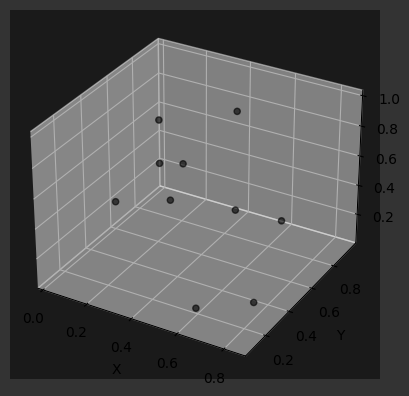

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='black', alpha=.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [62]:
def k_nn(X, K):
    pass